In [1]:
import numpy as np
import matplotlib.pyplot as plt
from metalog.metalog import Metalog
import scipy.interpolate as interp

In [2]:
eigvals = np.loadtxt("example_data/WESAD_eigenvalues.csv", delimiter=",")
spectrum = eigvals[0]

In [3]:
a = Metalog.fit(spectrum, K=range(3,10))
spectrum_metalog = Metalog(a)

In [4]:
a

array([ 478.7467297 ,   87.35450294,    9.25557198,  668.15304594,
       1515.7694498 ])

/tmp/ipykernel_171504/4010556215.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


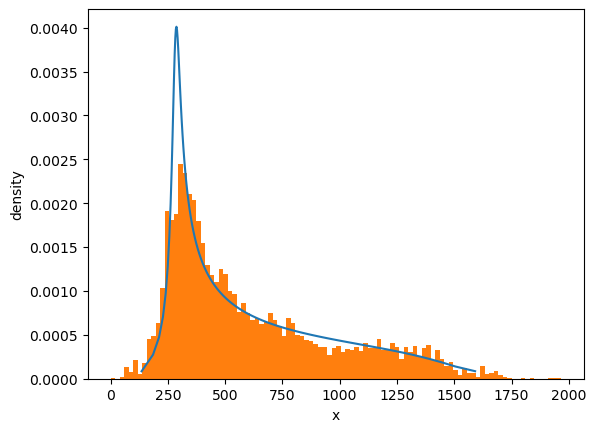

In [5]:
fig, ax = plt.subplots()
x = spectrum_metalog.support()
ax.plot(x, spectrum_metalog.pdf(x))
ax.hist(spectrum, density=True, bins=100)
ax.set_xlabel('x')
ax.set_ylabel('density')
fig.show()
fig.savefig('pdf1.pdf')

In [6]:
a = Metalog.fit(spectrum, 10)
spectrum_metalog = Metalog(a)
a

array([  480.01498917,   -92.93472169,   941.05920652,  1221.83100243,
       -2403.07658814,  1172.2580966 , -1582.87564767, -3353.98044795,
       11115.64538457, -2123.21174106])

/tmp/ipykernel_171504/3616884725.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


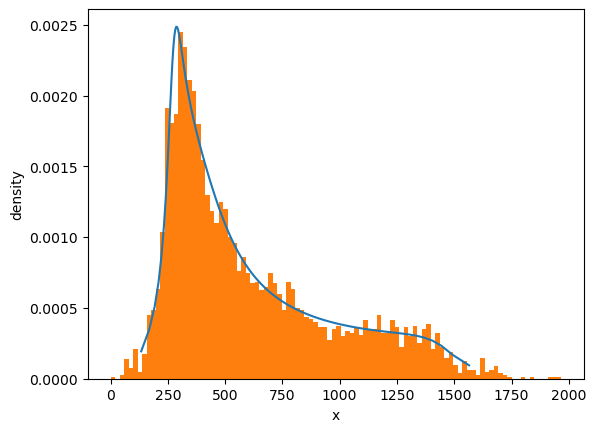

In [7]:
fig, ax = plt.subplots()
x = spectrum_metalog.support()
ax.plot(x, spectrum_metalog.pdf(x))
ax.hist(spectrum, density=True, bins=100)
ax.set_xlabel('x')
ax.set_ylabel('density')
fig.show()
fig.savefig('pdf2.pdf')